# Parte 1. 
Diseñando e implementando estructura básica de una red feedforward (MLP)

Para esta actividad, se realizará el diseño e implementación de la estructura de una red feedforward (MLP), la cual utilizará el dataset de MNIST (Modified National Institute of Standars and Technology), el cual contiene 60.000 imagenes de entrenamiento y 10.000 de testing, cada unas con una escala de 28x28 pixeles. Para el entrenamiento de esta red se utilizarán 3 funciones de activación (ReLu, Sigmoid y Tanh), las cuales serán puestas a prueba y serán comparadas en cuanto a precisión y tiempo de entrenamiento.

##1. Implementación y diseño de la red neuronal

In [40]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist

batch_size = 128
layer1_dense_size = 128

#Carga del dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split = ['train', 'test'],
    shuffle_files = True,
    as_supervised = True,
    with_info = True,
)

#########################################

In [41]:
# Probaremos las distintas funciones de activación de la red (ReLu, Sigmoid y Tanh)
# Modificaremos la cantidad de capas ocultas entre 1 y 3, utilizando un tamaño fijo de 128 neuronas en cada una de ellas

def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label


In [42]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls = tf.data.AUTOTUNE
)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


ds_test = ds_test.map(
    normalize_img, num_parallel_calls = tf.data.AUTOTUNE
)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

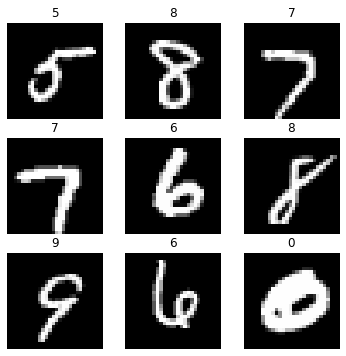

In [43]:
# Visualizar las imagenes del dataset

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
for images, labels in ds_train.take(1):
  for i in range(9):
    images_array = np.array(images[i], dtype='float')
    pixels = images_array.reshape((28, 28))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.title(int(labels[i]))
    plt.axis("off")

Se combinarán las distintas funciones de activación y cantidad de capas ocultas de la red
Se entrenará por 20 épocas y se evaluará el rendimiento de la red

In [47]:
# MODELO CON FUNCIÓN DE ACTIVACIÓN ReLu

model_relu = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), # <---- capas ocultas
  #tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model_relu.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001), #Optimizador, en este caso utilizaremos Adam, en la segunda parte probaremos los demás
    metrics = ['accuracy'],
)

history1 = model_relu.fit(
    ds_train,
    epochs = 20,
    validation_data = ds_test,
)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3592 - accuracy: 0.9000 - val_loss: 0.2004 - val_accuracy: 0.9404
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1692 - accuracy: 0.9520 - val_loss: 0.1409 - val_accuracy: 0.9572
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1227 - accuracy: 0.9653 - val_loss: 0.1141 - val_accuracy: 0.9657
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.0955 - val_accuracy: 0.9710
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0775 - accuracy: 0.9779 - val_loss: 0.0917 - val_accuracy: 0.9710
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0642 - accuracy: 0.9814 - val_loss: 0.0815 - val_accuracy: 0.9760
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0539 - accuracy: 0.9843 - val_loss: 0.0809 - val_accuracy: 0.9759
Epoch 

In [ ]:
# MODELO CON FUNCIÓN DE ACTIVACIÓN SIGMOID

model_sigmoid = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'), # <---- capas ocultas
  #tf.keras.layers.Dense(128, activation='sigmoid'),
  #tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10)
])

model_sigmoid.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001), #Optimizador, en este caso utilizaremos Adam, en la segunda parte probaremos los demás
    metrics = ['accuracy'],
)

history2 = model_sigmoid.fit(
    ds_train,
    epochs = 20,
    validation_data = ds_test,
)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6079 - accuracy: 0.8556 - val_loss: 0.3126 - val_accuracy: 0.9167
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2794 - accuracy: 0.9214 - val_loss: 0.2395 - val_accuracy: 0.9334
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2217 - accuracy: 0.9376 - val_loss: 0.1987 - val_accuracy: 0.9426
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1857 - accuracy: 0.9474 - val_loss: 0.1742 - val_accuracy: 0.9508
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1592 - accuracy: 0.9552 - val_loss: 0.1524 - val_accuracy: 0.9541
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1385 - accuracy: 0.9608 - val_loss: 0.1370 - val_accuracy: 0.9599
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.9653 - val_loss: 0.1261 - val_accuracy: 0.9626
Epoch 

In [ ]:
# MODELO CON FUNCIÓN DE ACTIVACIÓN TANH

model_tanh = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'), # <---- capas ocultas
  #tf.keras.layers.Dense(128, activation='tanh'),
  #tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10)
])

model_tanh.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001), #Optimizador, en este caso utilizaremos Adam, en la segunda parte probaremos los demás
    metrics = ['accuracy'],
)

history3 = model_tanh.fit(
    ds_train,
    epochs = 20,
    validation_data = ds_test,
) 

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3779 - accuracy: 0.8936 - val_loss: 0.2261 - val_accuracy: 0.9341
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2003 - accuracy: 0.9435 - val_loss: 0.1709 - val_accuracy: 0.9508
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1472 - accuracy: 0.9584 - val_loss: 0.1340 - val_accuracy: 0.9619
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1165 - accuracy: 0.9669 - val_loss: 0.1130 - val_accuracy: 0.9657
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0945 - accuracy: 0.9735 - val_loss: 0.1044 - val_accuracy: 0.9696
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0783 - accuracy: 0.9782 - val_loss: 0.0923 - val_accuracy: 0.9713
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0649 - accuracy: 0.9821 - val_loss: 0.0884 - val_accuracy: 0.9728
Epoch 

## 2. Resultados obtenidos
Los resultados obtenidos del entrenamiento de las redes, en base a su precisión y tiempo con las diferentes funciones de activación fueron los siguientes:

---

###ReLu:
- 1 capa = 0.9499 2s
- 2 capas = 0.9682 3s
- 3 capas = 0.9718 3s

###Sigmoid:
- 1 capa = 0.9381 2s
- 2 capas = 0.9484 3s
- 3 capas = 0.9472 3s

###Tanh:
- 1 capa = 0.9249 2s
- 2 capas = 0.9365 3s
- 3 capas = 0.9301 3s

---


## 3. Análisis de resultados   

* **¿Existieron cambios significativos en el tiempo de entrenamiento?** 


Los resultados de las redes FeedForward con diferentes funciones de activación no varían en tiempo. Teniendo la ReLu, Tanh y Sigmoid en las pruebas de las una a tres capas ocultas la misma velocidad. Se teoriza que esto puede deberse a la simplicidad de la operación y cantidad de datos. Más no es igual en la medición de tiempo entre diferente número de capas ocultas. Teniendo una clara ventaja en tiempo, los modelos con solo 1 capa oculta, con 2 y 3 capas tardan 1 segundo más. Esto lo atribuimos directamente a que, la cantidad de capas y sus neuronas es proporcional al tiempo que tarde en efectuarse el entrenamiento.


* **¿Cuál fue el impacto en la precisión de la clasificación?**


En cuanto a la precisión al momento de realizar el entrenamiento, podemos notar que en las 3 funciones de activación y tanto ejecutando 1 hasta 3 capas, el valor de la precisión siempre se ha encontrado por encima del 90% (0.9000), por lo que tampoco ha existido una mayor diferencia de precisión entre los 3 tipos de funciones (ReLu, Sigmoid y Tahn), esto se debe a que el modelo mismo posee una cantidad pequeña de datos (comparado a otros modelos con una mayor cantidad de información), por lo que la diferencia no será tan notoria en un caso como este.




* **De acuerdo a lo aprendido y experimentado en tiempos de entrenamiento, ¿por qué se producen diferencias entre una función y otra?**

En cuanto a la precisión del modelo, podemos ver que la función ReLu es la que mejor se ajusta en los tres escenarios. En segundo lugar, está la Sigmoide y tercer lugar la Tanh. Interpretamos y teorizamos que esto puede deberse a la salida que generan estas. Por ejemplo, la sigmoidal genera datos en el rango de 0 y 1 y cuando ingresan valores muy negativos o muy positivos se satura y la función de error que se genera en el entrenamiento y que compara la categoría que asigna la neurona durante la clasificación con la que realmente pertenece no es representada de la mejor manera. La función tangente hiperbólica posee un problema bastante similar a la anterior. Pero, la función rectified linear unit, puede entregar por salida valores mucho más representativos y el contraste con la función de error es más certero.

**Para los tres modelos, se adjunta un gráfico que muestra la evolución de la precisión y otro la evolución de la pérdida, visualiza también las 3 funciones de activación** 

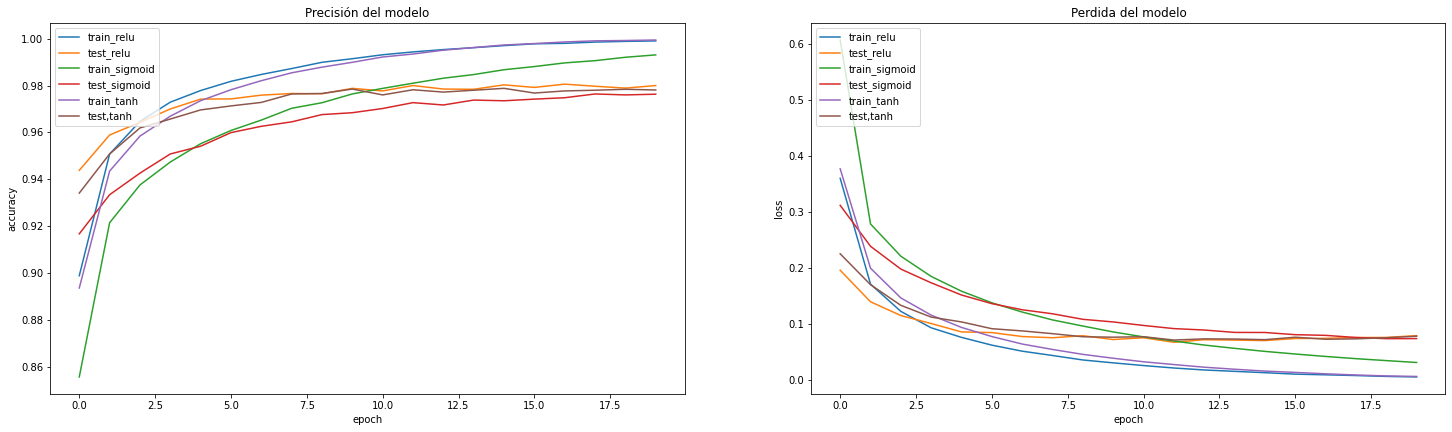

In [ ]:
#################################
# Inserta tus gráficos aquí

plt.figure(figsize=(25, 15))

# Gráfico de presición

ax = plt.subplot(2,2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_relu', 'test_relu', 'train_sigmoid', 'test_sigmoid', 'train_tanh', 'test,tanh'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_relu', 'test_relu', 'train_sigmoid', 'test_sigmoid', 'train_tanh', 'test,tanh'], loc = 'upper right')

#################################

#  Parte 2. 

Mejorando el accuracy del Modelo Red Neuronal feedforward fully connected (MLP), modificando capacidades en cuanto a capas ocultas, épocas y optimizadores. 

In [1]:
###############################
# Entrena nuevamente la red modificando capacidad

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist

batch_size = 128
layer1_dense_size = 128

#Carga del dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split = ['train', 'test'],
    shuffle_files = True,
    as_supervised = True,
    with_info = True,
)
###############################

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [2]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

In [3]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls = tf.data.AUTOTUNE
)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


ds_test = ds_test.map(
    normalize_img, num_parallel_calls = tf.data.AUTOTUNE
)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

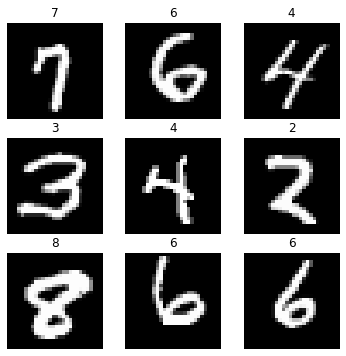

In [4]:
# Visualizar las imagenes
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
for images, labels in ds_train.take(1):
  for i in range(9):
    images_array = np.array(images[i], dtype='float')
    pixels = images_array.reshape((28, 28))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.title(int(labels[i]))
    plt.axis("off")

## 4. Modificando las capacidades de la red neuronal

En cuanto a los optimizadores, estos pueden ser cambiados dentro de la variable **optimizer**, en este caso se usarán los optimizadores Adam, SGD y RMSprop. Se usarán diferentes combinaciones de capas ocultas, épocas y optimizadores, para posteriormente registrar los resultados obtenidos.

In [13]:
model_relu = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), # <---- capas ocultas
  tf.keras.layers.Dense(10)
])

model_relu.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.RMSprop(0.001), # <---- optimizador
    metrics = ['accuracy'],
)

history1 = model_relu.fit(
    ds_train,
    epochs = 5,
    validation_data = ds_test,
)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3421 - accuracy: 0.9053 - val_loss: 0.1909 - val_accuracy: 0.9434
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1597 - accuracy: 0.9543 - val_loss: 0.1301 - val_accuracy: 0.9614
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9677 - val_loss: 0.1114 - val_accuracy: 0.9683
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0878 - accuracy: 0.9743 - val_loss: 0.0911 - val_accuracy: 0.9726
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0711 - accuracy: 0.9794 - val_loss: 0.1034 - val_accuracy: 0.9691
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0599 - accuracy: 0.9828 - val_loss: 0.0796 - val_accuracy: 0.9757
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.0790 - val_accuracy: 0.9766
Epoch 

In [25]:
model_sigmoid = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'), # <---- capas ocultas
  tf.keras.layers.Dense(10)
])

model_sigmoid.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.RMSprop(0.001), # <---- optimizador
    metrics = ['accuracy'],
)

history2 = model_sigmoid.fit(
    ds_train,
    epochs = 30,
    validation_data = ds_test,
)

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5369 - accuracy: 0.8702 - val_loss: 0.2794 - val_accuracy: 0.9215
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2509 - accuracy: 0.9282 - val_loss: 0.2144 - val_accuracy: 0.9376
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2011 - accuracy: 0.9415 - val_loss: 0.1840 - val_accuracy: 0.9464
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1691 - accuracy: 0.9515 - val_loss: 0.1614 - val_accuracy: 0.9510
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1461 - accuracy: 0.9575 - val_loss: 0.1448 - val_accuracy: 0.9581
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1281 - accuracy: 0.9630 - val_loss: 0.1294 - val_accuracy: 0.9617
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1133 - accuracy: 0.9672 - val_loss: 0.1204 - val_accuracy: 0.9647
Epoch 

In [37]:
model_tanh = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'), # <---- capas ocultas
  tf.keras.layers.Dense(10)
])

model_tanh.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001), # <---- optimizador
    metrics = ['accuracy'],
)

history3 = model_tanh.fit(
    ds_train,
    epochs = 30,
    validation_data = ds_test,
)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3741 - accuracy: 0.8939 - val_loss: 0.2274 - val_accuracy: 0.9344
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1973 - accuracy: 0.9433 - val_loss: 0.1676 - val_accuracy: 0.9531
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1456 - accuracy: 0.9588 - val_loss: 0.1360 - val_accuracy: 0.9603
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1139 - accuracy: 0.9678 - val_loss: 0.1168 - val_accuracy: 0.9656
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.9745 - val_loss: 0.1050 - val_accuracy: 0.9699
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0758 - accuracy: 0.9791 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0633 - accuracy: 0.9827 - val_loss: 0.0872 - val_accuracy: 0.9748
Epoch 

## 5. Resultados obtenidos



**Con función de activación ReLu**

---

**2 capas y 5 épocas:**
- SGD = Accuracy de 0.7874 en 2 segundos
- Adam = Accuracy de 0.9750 en 2 segundos
- RMsPro = Accuracy de 0.9733 en 2 segundos

**1 capa y 20 épocas:**
- SGD = Accuracy de 0.8627 en 2 segundos
- Adam = Accuracy de 0.9820 en 2 segundos
- RMsPro = Accuracy de 0.9800 en 2 segundos

**5 capas y 20 épocas:**
- SGD = Accuracy de 0.8896 en 2 segundos
- Adam = Accuracy de 0.9770 en 2 segundos
- RMsPro = Accuracy de 0.9795 en 2 segundos

**1 capa y 30 épocas:**
- SGD = Accuracy de 0.8978 en 1 segundo
- Adam = Accuracy de 0.9792 en 1 segundo
- RMsPro = Accuracy de 0.9784 en 2 segundos



**Con función de activación Sigmoid**

---

**2 capas y 5 épocas:**
- SGD = Accuracy de 0.1354 en 2 segundos
- Adam = Accuracy de 0.9628 en 2 segundos
- RMsPro = Accuracy de 0.9643 en 2 segundos

**1 capa y 20 épocas:**
- SGD = Accuracy de 0.7899 en 2 segundos
- Adam = Accuracy de 0.9780 en 2 segundos
- RMsPro = Accuracy de 0.9784 en 3 segundos

**5 capas y 20 épocas:**
- SGD = Accuracy de 0.1135 en 2 segundos
- Adam = Accuracy de 0.9719 en 2 segundos
- RMsPro = Accuracy de 0.9651 en 4 segundos

**1 capa y 30 épocas:**
- SGD = Accuracy de 0.8213 en 2 segundos
- Adam = Accuracy de 0.9786 en 2 segundos
- RMsPro = Accuracy de 0.9791 en 2 segundos



**Con función de activación Tanh**

---

**2 capas y 5 épocas:**
- SGD = Accuracy de 0.8231 en 2 segundos
- Adam = Accuracy de 0.9742 en 2 segundos
- RMsPro = Accuracy de 0.9765 en 2 segundos

**1 capa y 20 épocas:**
- SGD = Accuracy de 0.8784 en 2 segundos
- Adam = Accuracy de 0.9784 en 2 segundos
- RMsPro = Accuracy de 0.9787 en 2 segundos

**5 capas y 20 épocas:**
- SGD = Accuracy de 0.9029 en 2 segundos
- Adam = Accuracy de 0.9775 en 2 segundos
- RMsPro = Accuracy de 0.9770 en 3 segundos

**1 capa y 30 épocas:**
- SGD = Accuracy de 0.8940 en 2 segundos
- Adam = Accuracy de 0.9761 en 2 segundos
- RMsPro = Accuracy de 0.9790 en 2 segundos



## 6. Análisis de resultados   

**Gráfico de entrenamiento donde se representan las 3 funciones de activación y visualiza la precisión y perdida del modelo**


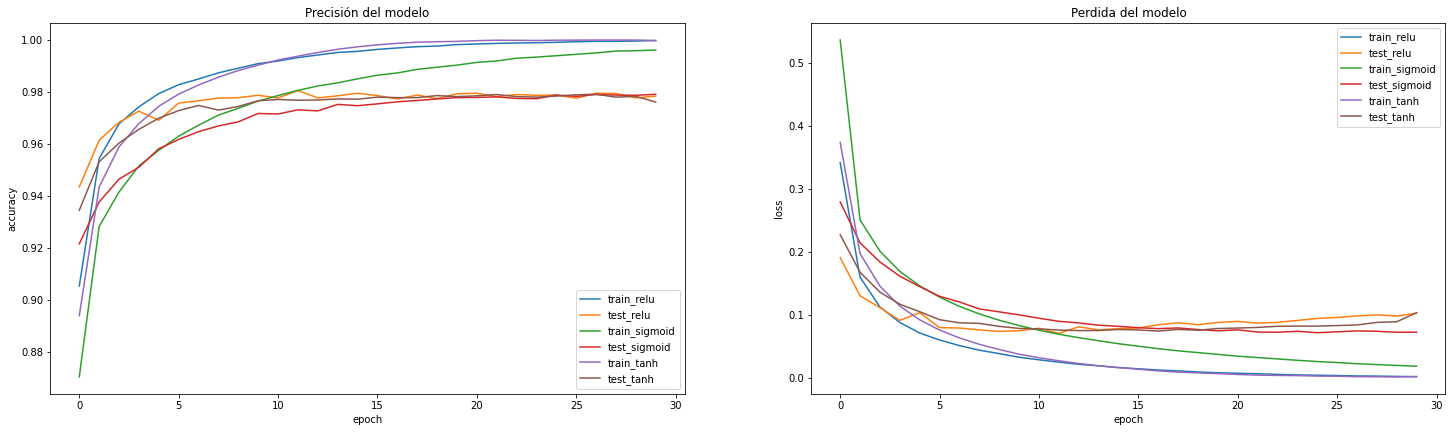

In [39]:
###############################
# Crea tus gráficos acá

plt.figure(figsize=(25, 15))

# Gráfico de presición

ax = plt.subplot(2,2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_relu', 'test_relu', 'train_sigmoid', 'test_sigmoid', 'train_tanh', 'test_tanh'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_relu', 'test_relu', 'train_sigmoid', 'test_sigmoid', 'train_tanh', 'test_tanh'], loc = 'upper right')

###############################